# Fish Dataset 

<img src="https://images.unsplash.com/photo-1613779907266-f85db34edae5?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=856&q=80" style="background-size:cover; height:250px;">

Analyzing, predicting the fish weight using Linear Regression and the classifying the species of Fish using the Logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("dark_background")

In [2]:
df = pd.read_csv("fish_specices.csv")
df.sample(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
61,Parkki,55.0,13.5,14.7,16.5,6.8475,2.3265
21,Bream,685.0,31.4,34.0,39.2,15.9936,5.3704
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415
104,Perch,265.0,25.4,27.5,28.9,7.0516,4.3350
143,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440


## Understanding the Data

    Weight - weight of fish in gram
    Lenght1 - vetical length in cm
    Lenght2 - diagonal length in cm
    Lenght3 - cross length in cm
    Height - height in cm
    Width - diagonal width in cam

## Data cleaning

In [3]:
df = df.rename(columns={'Length1':'vertical_len', 'Length2':'diagonal_len', 'Length3':'cross_len'}) #renaming
df.sample(5)

,Species,Weight,vertical_len,diagonal_len,cross_len,Height,Width
51,Roach,180.0,23.6,25.2,27.9,7.0866,3.9060
70,Parkki,273.0,23.0,25.0,28.0,11.0880,4.1440
100,Perch,197.0,23.5,25.6,27.0,6.5610,4.2390
140,Pike,950.0,48.3,51.7,55.1,8.9262,6.1712
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320


In [4]:
df.isna().sum() #cheacking for nan values

Species         0
Weight          0
vertical_len    0
diagonal_len    0
cross_len       0
Height          0
Width           0
dtype: int64

## Data Exploration and Visualization

In [5]:
df.describe()

,Weight,vertical_len,diagonal_len,cross_len,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
df["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

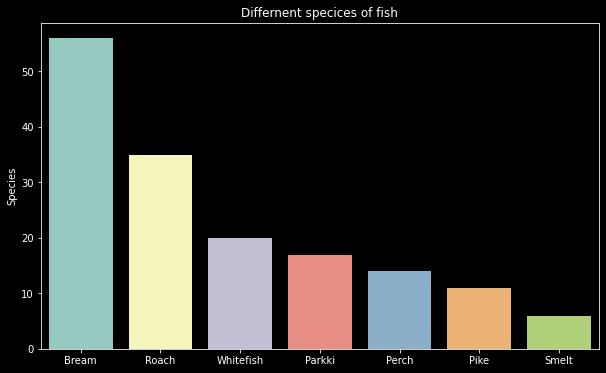

In [7]:
import seaborn as sns
plt.figure(figsize=(10, 6))

sns.barplot(data=df, x=df["Species"].unique(), y=df["Species"].value_counts())
plt.title("Differnent specices of fish")
plt.show()

In [8]:
df.corr()

,Weight,vertical_len,diagonal_len,cross_len,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
vertical_len,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
diagonal_len,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
cross_len,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


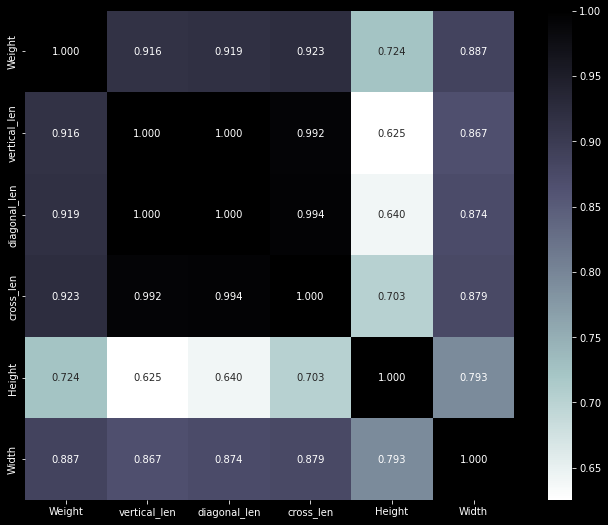

In [9]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot = True, cmap=plt.cm.bone_r, fmt='.3f', square=True)
plt.show()

## Data Cleaning

Remove the features thats are highly correlated btw each other in independent variables like *['Weight', 'vertical_len', 'diagonal_len', 'cross_len']*

In [10]:
df_copy = df.copy()
df_copy = df_copy.drop(['vertical_len', 'diagonal_len', 'cross_len'], axis=1)
df_copy.sample(5)

,Species,Weight,Height,Width
140,Pike,950.0,8.9262,6.1712
96,Perch,225.0,7.2930,3.7230
115,Perch,690.0,10.5717,6.3666
45,Roach,160.0,7.0334,3.8203
75,Perch,51.5,4.5924,2.6316


## Regression

In [11]:
df1 = df_copy.drop('Species', axis=1)
df1.head(5)

,Weight,Height,Width
0,242.0,11.5200,4.0200
1,290.0,12.4800,4.3056
2,340.0,12.3778,4.6961
3,363.0,12.7300,4.4555
4,430.0,12.4440,5.1340


Visualize a scatter plot ***Weight vs Height*** and ***Weight vs Width***

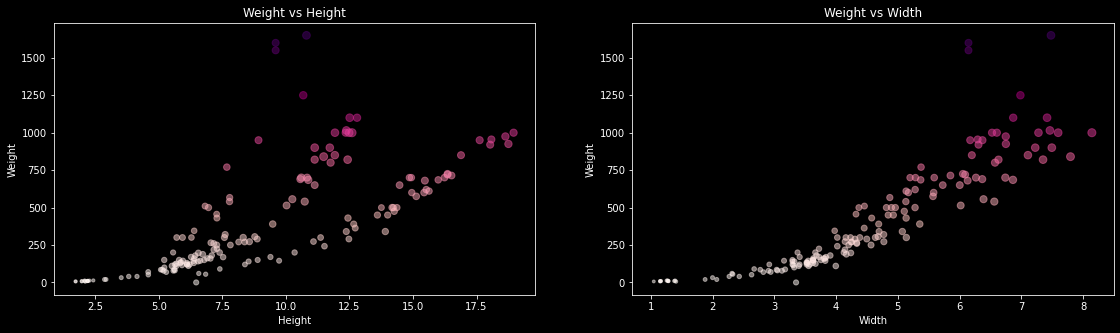

In [38]:
c = df1['Weight']

plt.figure(figsize=(19,5))
plt.subplot(1, 2, 1)
plt.scatter(df1['Height'], df1['Weight'], c=c, cmap = 'RdPu', s = df1['Width']*8, alpha=0.5)
plt.title("Weight vs Height")
plt.xlabel("Height")
plt.ylabel("Weight")

plt.subplot(1, 2, 2)

plt.scatter(df1['Width'], df1['Weight'], c=c, cmap = plt.cm.RdPu, s = df1['Width']*8, alpha=0.5)
plt.title("Weight vs Width")
plt.xlabel("Width")
plt.ylabel("Weight")

plt.show()

*Train test split*

In [13]:
X, y = df1.drop('Weight', axis=1), df1['Weight'].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.7)

### Using Linear Regression for predicting the fish weight

In [15]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

In [16]:
LR_model.fit(X_train, y_train)

LinearRegression()

In [17]:
LR_model.score(X_test, y_test)

0.8420412366115981

### Using Polynominal Regression for predicting the fish weight

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_variables = poly.fit_transform(X_train)

poly_var_train, poly_var_test, res_train, res_test = train_test_split(poly_variables, y_train, train_size=0.7, random_state=4)

regression = LinearRegression()

model = regression.fit(poly_var_train, res_train)

In [19]:
score = model.score(poly_var_test, res_test)
score

0.887021029434365

## Classification of the diffirent species of fishes using the Logistic Regression

In [20]:
X1, y1 = df.drop('Species', axis=1), df['Species']

In [21]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

Prepocessing - *Feature scaling*

In [22]:
scaler = StandardScaler()
X1 = pd.DataFrame(scaler.fit_transform(X1), columns=X1.columns)
X1.sample(5)

,Weight,vertical_len,diagonal_len,cross_len,Height,Width
81,-0.878032,-0.807547,-0.787799,-0.883647,-0.910194,-0.979168
149,-1.088764,-1.560184,-1.611570,-1.626712,-1.612044,-1.868668
124,1.686065,1.360049,1.365240,1.207305,0.693192,1.701710
51,-0.611814,-0.265648,-0.301025,-0.287466,-0.441030,-0.304366
142,3.367440,2.985746,2.956616,2.831680,0.147215,1.027385


Prepocessing - *Encoding*

In [23]:
y1 = df['Species']

In [24]:
encoder = LabelEncoder()
y1 = encoder.fit_transform(y1)

In [25]:
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5])

In [26]:
y_mappings = {index: label for index, label in enumerate(encoder.classes_)}
y_mappings

{0: 'Bream',
 1: 'Parkki',
 2: 'Perch',
 3: 'Pike',
 4: 'Roach',
 5: 'Smelt',
 6: 'Whitefish'}

*Train test split*

In [27]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42, train_size=0.7)

*Model*

In [28]:
from sklearn.linear_model import LogisticRegression
LogR_model = LogisticRegression()

In [29]:
LogR_model.fit(X1_train, y1_train)

LogisticRegression()

In [30]:
LogR_model.score(X1_test, y1_test)

0.8541666666666666

In [31]:
from sklearn.metrics import confusion_matrix
y1_pred = LogR_model.predict(X1_test)
cm = confusion_matrix(y1_test, y1_pred) # actual values vs the predicted values

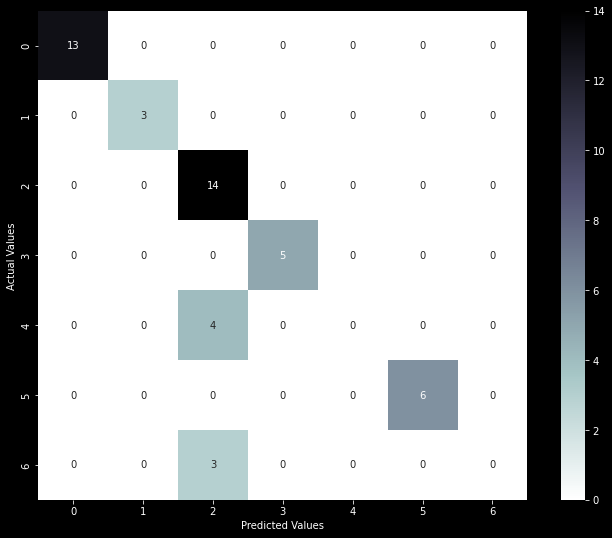

In [43]:
plt.figure(figsize=(12,9))
sns.heatmap(cm, annot = True, cmap=plt.cm.bone_r, square=True)

plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()